# SHAP Explainability Analysis

**Dataset:** Breast Cancer  
**Models:** Random Forest, Logistic Regression  
**Goal:** Compare SHAP explanations and interpret feature influence


In [ ]:
import shap
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


Load Dataset

In [9]:
data = load_breast_cancer()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


## 1. SHAP Comparison: Random Forest vs Logistic Regression


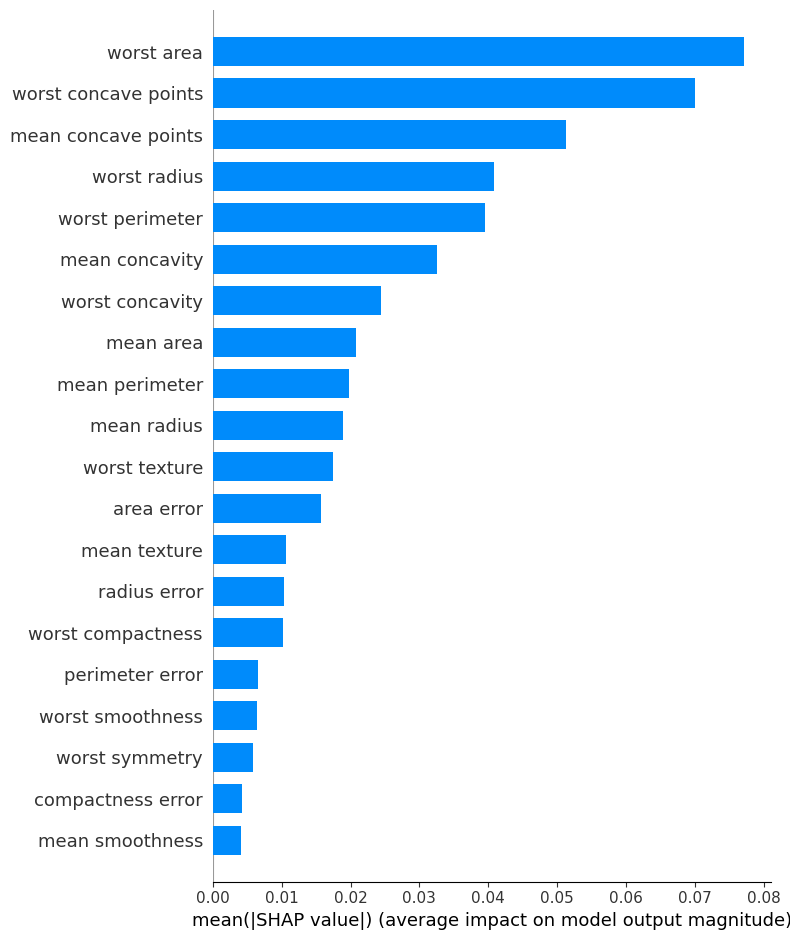

In [16]:
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_train)
shap.summary_plot(shap_values_rf[:, :, 1], X_train, plot_type="bar")



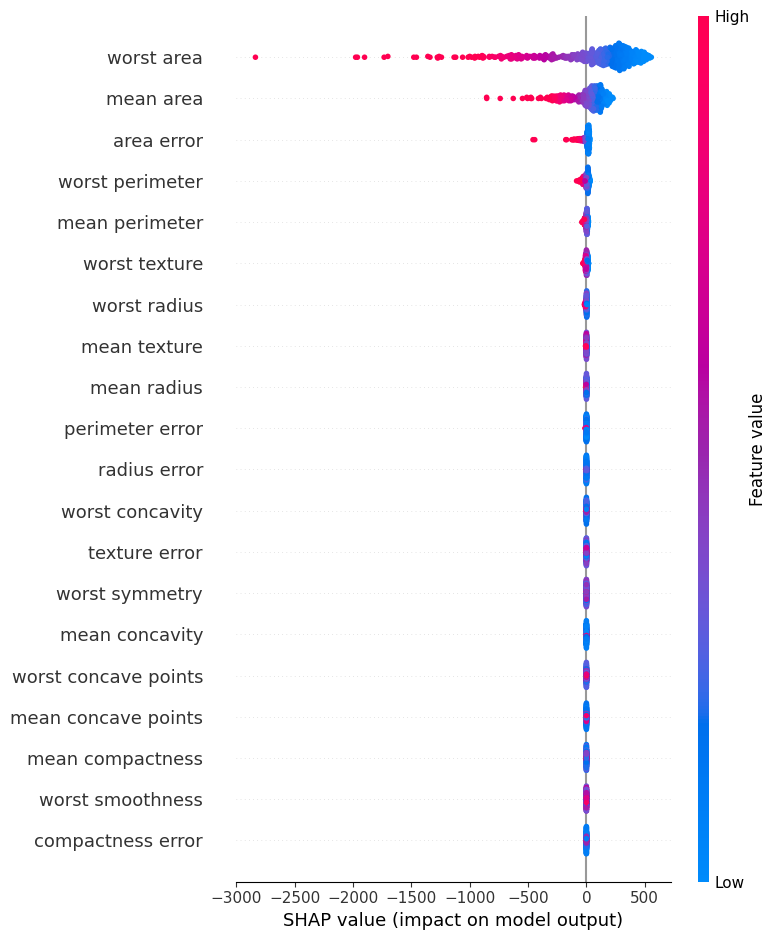

In [17]:
explainer_log = shap.Explainer(log_model, X_train)
shap_values_log = explainer_log(X_train)

shap.summary_plot(shap_values_log, X_train)


**Observation:**

- Random Forest highlights non-linear and interaction-based features such as
  `worst perimeter`, `mean concavity`, and `worst radius`.
- Logistic Regression emphasizes linearly influential features such as
  `mean radius`, `mean texture`, and `mean perimeter`.
- The dominant features in both models are related to tumor size and shape.


## 2. SHAP Force Plots for Individual Predictions


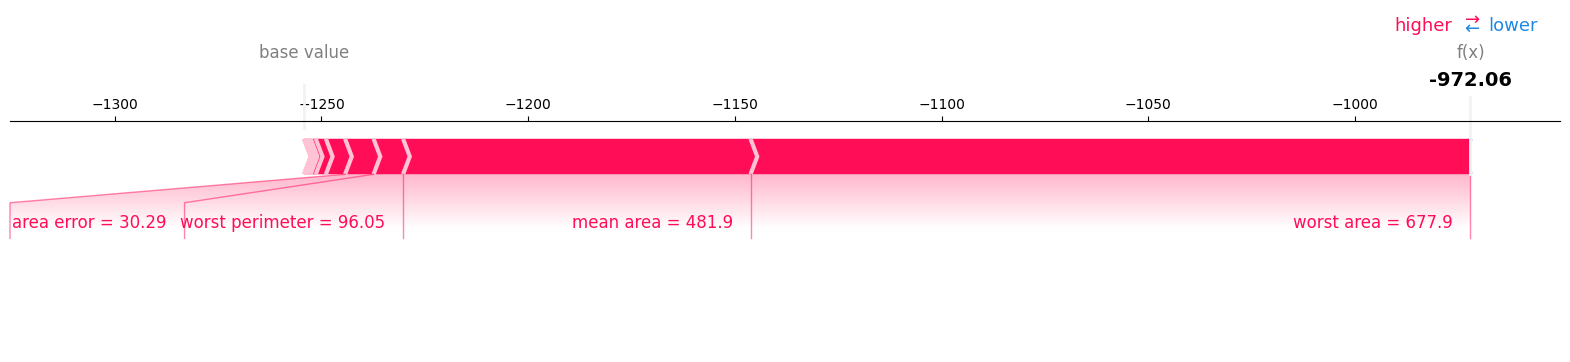

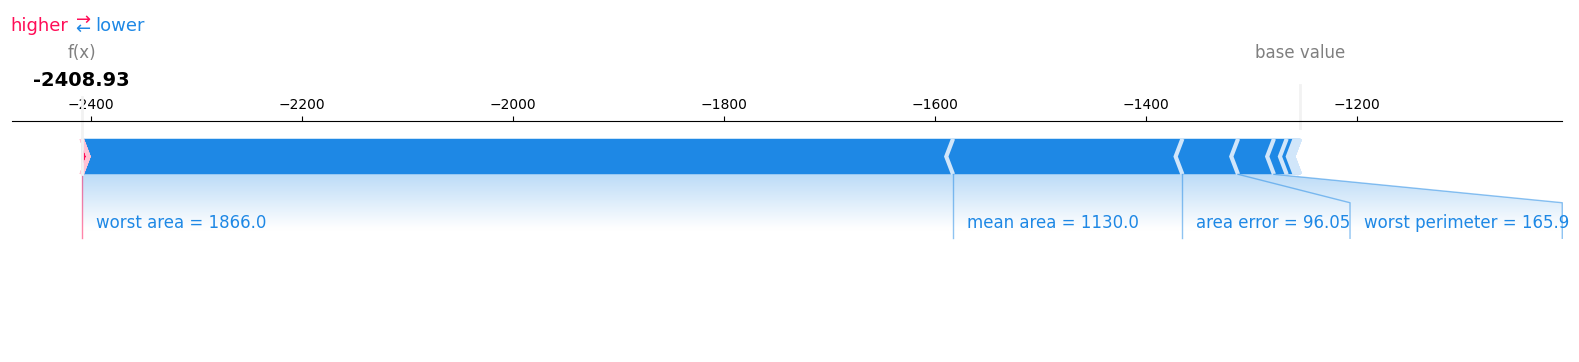

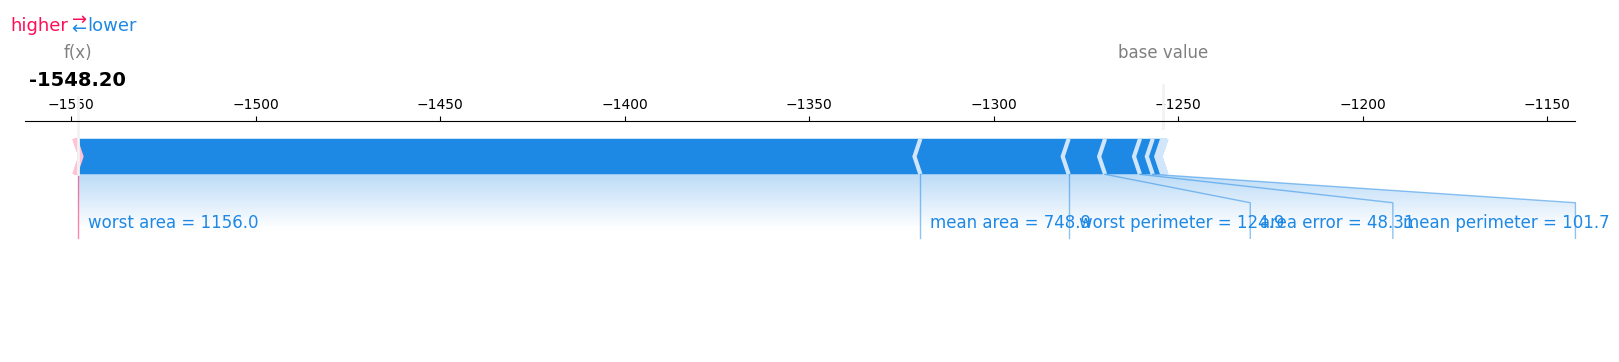

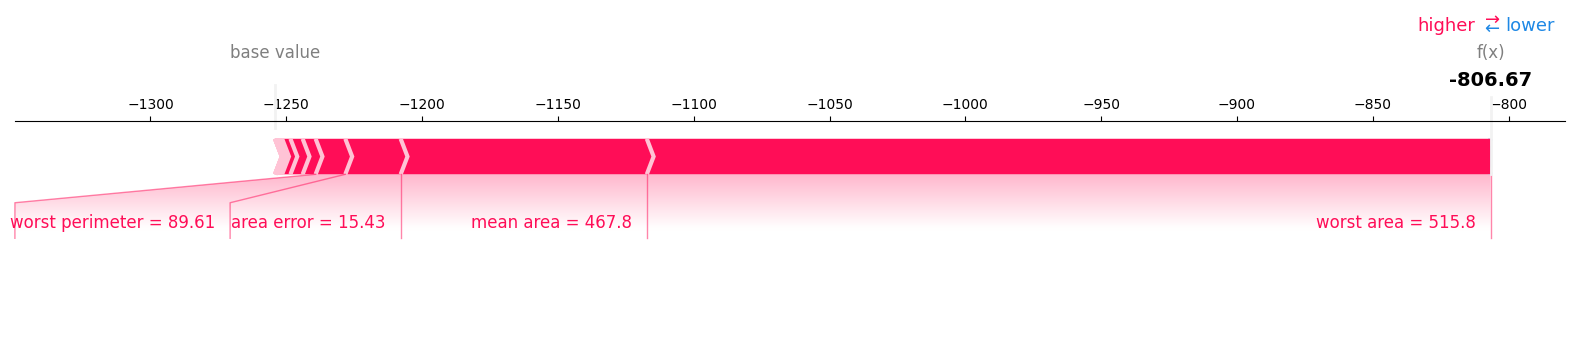

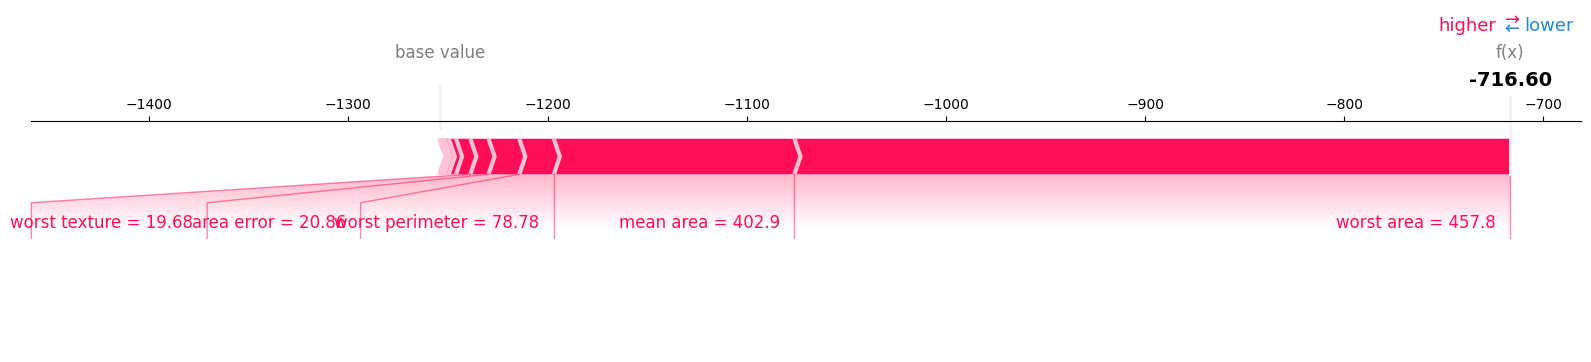

In [18]:
X_sample = X_test.iloc[:5]
shap_values_sample = explainer_log(X_sample)

for i in range(5):
    shap.force_plot(
        explainer_log.expected_value,
        shap_values_sample[i].values,
        X_sample.iloc[i],
        matplotlib=True
    )


Each force plot explains an individual prediction.
Red features increase the probability of malignancy,
while blue features decrease it.


## 3. Machine Learning Pipeline


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=5)),
    ("logistic", LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)


,steps,"[('scaler', ...), ('pca', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_components,5
,copy,True
,whiten,False
,svd_solver,'auto'


The pipeline standardizes the data, reduces dimensionality using PCA,
and applies logistic regression for classification.
PCA improves efficiency but reduces feature interpretability.


## 4. Interpretation of Feature: Mean Radius

Mean radius is one of the most influential features in both models.
Higher values of mean radius push predictions toward the malignant class,
while lower values contribute to benign classification.
This aligns with medical understanding that larger tumors have a higher
risk of being cancerous.
